<a href="https://colab.research.google.com/github/msrepo/ml-mscise-2023/blob/master/prerequisites/Optimization_and_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adapted from (mostly change in notation so that the notebook follows our course notes): https://github.com/kuleshov/cornell-cs5785-2020-applied-ml/blob/main/notebooks/lecture3-linear-regression.ipynb

Orginal Notebook by:

**Volodymyr Kuleshov**

Cornell Tech

**Part 1: Optimization and Calculus Background**

We will first dive deeper into the question of optimization.

**Review: Components of a supervised machine learning problem**

At a high level, a supervised machine learning problem has the following structure:

$Dataset+Learning Algorithm → Predictive Model$

The predictive model is choosen to model the relationship between inputs and targets. For instance, it can predict future targets.


**Optimization: Notation**
At a high-level an optimizer takes
- a cost(loss) function $L$ and
- a model class $M$ and finds a model $f_Θ \in M$ with the smallest value of the cost function $L$

\begin{align}
 \min_{f_Θ\in M}L(f)
\end{align}

Intuitively, this is the function that best "fits" the data on the training dataset $D = \{(x_i,y_i)| i=1,2,...,n\}$.

We will use a quadratic function as our running example for the cost function $L$.

In [49]:
import numpy as np
import matplotlib.pyplot as plt


In [50]:
def quadratic_function(theta):
  """ y = f(x) = aθ^2 + bθ + c """
  return 0.5 * (2*theta - 1)**2

We can visualize it.

Text(0.5, 1.0, 'Simple quadratic_function')

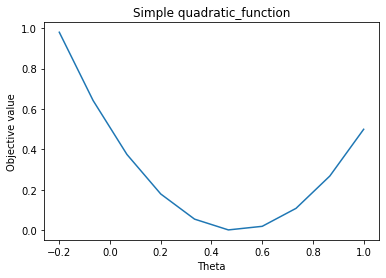

In [51]:
# first construct a grid of theta1 parameter pairs and their corresponding
# cost function values
thetas = np.linspace(-0.2,1,10)
f_vals = quadratic_function(thetas[:np.newaxis])

plt.plot(thetas,f_vals)
plt.xlabel('Theta')
plt.ylabel('Objective value')
plt.title('Simple quadratic_function')

**Calculus Review: Derivatives**
Recall that the derivative
\begin{equation*}
\frac{df(θ_0)}{dθ}
\end{equation*}
of a univariate function $f:ℝ → ℝ$ is the instantaneous rate of change of the function $f(θ)$ with respect to its parameter $θ$ at the point $θ_0$.

Text(0.5, 1.0, 'Simple quadratic function')

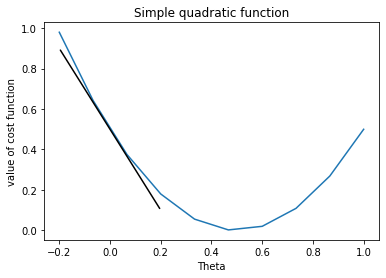

In [52]:
def quadratic_derivative(theta):
  return (2*theta-1)*2

dfθ = quadratic_derivative(np.array([[0]])) # derivative at zero
fθ = quadratic_function(np.array([[0]]))
line_length = 0.2

plt.plot(thetas,f_vals)
plt.annotate('',xytext=(0 - line_length,fθ - line_length*dfθ), xy = (0+line_length,fθ+line_length*dfθ),
             arrowprops={'arrowstyle':'-','lw':1.5},va='center',ha='center')
plt.xlabel('Theta')
plt.ylabel('value of cost function')
plt.title('Simple quadratic function')


Text(0.5, 1.0, 'Simple quadratic function')

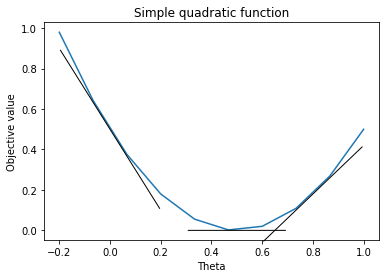

In [53]:
pts = np.array([0,0.5,0.8]).reshape((3,1))
dfθs = quadratic_derivative(pts)
fθs = quadratic_function(pts)

plt.plot(thetas,f_vals)
for pt,f0,df0 in zip(pts.flatten(),fθs.flatten(),dfθs.flatten()):
  plt.annotate('',xytext=(pt-line_length, f0-line_length*df0),
               xy=(pt+line_length, f0+line_length*df0),
    arrowprops={'lw':1,'arrowstyle':'-'},va='center',ha='center')
plt.xlabel('Theta')
plt.ylabel('Objective value')
plt.title('Simple quadratic function')

**Calculus Review: Partial Derivatives**

The partial derivative
$$ 
\frac{∂f(\theta_0)}{∂θ_j}
$$
of a multivariate function $f:ℝ^d → ℝ$ is the derivative of $f$ with respect to $θ_j$ while all other inputs $\theta_k$ for $k\neq j$ are fixed.

**Calculus Review: The Gradient**

The gradient $∇_\theta f$ further extends the derivative to multivariate functions $f:ℝ^d→ℝ$, and is defined at a point $θ_0$ as 
$$
∇_\theta f(\theta_0) = 
\begin{pmatrix}
\frac{∂f(\theta_0)}{∂θ_0} \\
\frac{∂f(\theta_0)}{∂θ_1} \\
\vdots \\
\frac{∂f(\theta_0)}{∂θ_d}
\end{pmatrix}
$$

The j-th entry of the vector $∇_\theta f(\theta_0)$ is the partial derivative $\frac{∂f(\theta_0)}{∂θ_j}$ of $f$ with respect to the j-th component of θ.

We will use a quadratic function as a running example.

In [54]:
def quadratic_function2d(theta0,theta1):
  """Quadratic cost function, L(theta0, theta1)

  The inputs theta0, theta1 are 2d arrays and we evaluate
  the objective at each value theta0[i,j], theta1[i,j].
  We implement it this way so it is easier to plot the 
  level curves of the function in 2d.

  Parameters:
  theta0 (np.array): 2d array of first parameter theta0
  theta1 (np.array): 2d array of second parameter theta1

  Returns:
  fvals (np.array): 2d array of objective function values
    fvals is the same dimension as theta0 and theta1.
    fvals[i,j] is the value at theta0[i,j] and theta1[i,j]
  """
  theta0 = np.atleast_2d(np.asarray(theta0))
  theta1 = np.atleast_2d(np.array(theta1))
  return 0.5 * ((2*theta1 - 2)**2 + (theta0-3)**2)
  

Let's visualize this function.

(-4.0, 7.0, -1.0, 4.0)

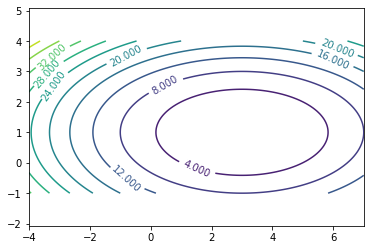

In [55]:
theta0_grid = np.linspace(-4,7,101)
theta1_grid = np.linspace(-1,4,101)
theta_grid = theta0_grid[np.newaxis,:],theta1_grid[:,np.newaxis]
L_grid = quadratic_function2d(theta0_grid[np.newaxis,:],theta1_grid[:,np.newaxis])

X,Y = np.meshgrid(theta0_grid, theta1_grid)
contours = plt.contour(X,Y,L_grid,10)
plt.clabel(contours)
plt.axis('equal')

Let's write down the derivative of the quadratic function.

In [56]:
def quadratic_derivative2d(theta0, theta1):
  """ Derviative of quadratic loss function
  
  The inputs theta0, theta1 are 1d arrays and we evaluate
  the derivative at each value theta0[i],theta1[i].

  Parameters:
  theta0 (np.array): 1d array of first parameter theta0
  theta1 (np.array): 1d array of seconda parameter theta1

  Returns:
  grads (np.array): 2d array of partial derivatives.
    grads is of the same size as theta0 and theta1
    along first dimension and of size two along the second
    dimension.
    grads[i,j] is the j-th partial derivative at input theta0[i],theta1[j]
  """
  grads = np.stack([theta0 -3, (2*theta1 - 2)*2],axis=1)
  grads = grads.reshape([len(theta0),2])
  return grads

We can visualize the derivative.

(-4.0, 7.0, -1.0, 4.0)

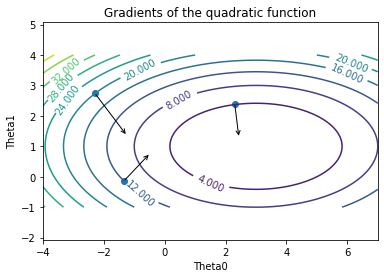

In [57]:
theta0_pts, theta1_pts = np.array([2.3, -1.35, -2.3]), np.array([2.4, -0.15, 2.75])
dfs = quadratic_derivative2d(theta0_pts, theta1_pts)
line_length = 0.2

contours = plt.contour(X,Y,L_grid,10)
for theta0_pt, theta1_pt, df0 in zip(theta0_pts, theta1_pts, dfs):
  plt.annotate('',xytext =(theta0_pt, theta1_pt),
               xy =(theta0_pt-line_length*df0[0],theta1_pt - line_length*df0[1]),
               arrowprops={'arrowstyle':'->'},va='center',ha='center')
plt.scatter(theta0_pts, theta1_pts)
plt.clabel(contours)
plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.title('Gradients of the quadratic function')
plt.axis('equal')

## **Part 1b: Gradient Descent**

Next, we will use gradients to define an important algorithm called gradient descent.

**Gradient Descent: Intuition*

Gradient descent is a very common optimization algorithm used in machine learning.

The intuition behind gradient descent is to repeatedly obtain the gradient to determine the direction in which the function decreases most steeply and take a step in that direction.

**Gradient Descent: Notation**
More formally, if we want to optimize $L(\theta)$, we start with an initial guess $\theta_0$ for the parameters and repeat the following update until $\theta$ is no longer changing:

$$
\theta_i = \theta_{i-1} - α * \nabla_\theta L(\theta_{i-1})
$$

As code, this method may look as follows:

```python
theta, theta_prev = random_initialization()
while norm(theta - theta_prev) > convergence_threshold:
  theta_prev = theta
  theta = theta_prev - step_size * gradient(theta_prev)
```
In the above algorithm, we stop when $||\theta_i - \theta_{i-1}||$ is small.

It is easy to implement this function in numpy.

In [58]:
convergence_threshold = 2e-1
step_size = 2e-1
theta, theta_prev = np.array([[-2],[3]]), np.array([[0],[0]])
opt_pts = [theta.flatten()]
opt_grads = []

while np.linalg.norm(theta - theta_prev) > convergence_threshold:
  # we repeat this while the value of the function is decreasing
  theta_prev = theta
  gradient = quadratic_derivative2d(*theta).reshape([2,1])
  theta = theta_prev - step_size * gradient
  opt_pts += [theta.flatten()]
  opt_grads += [gradient.flatten()]
  

We can now visuallize gradient descent.

(-4.0, 7.0, -1.0, 4.0)

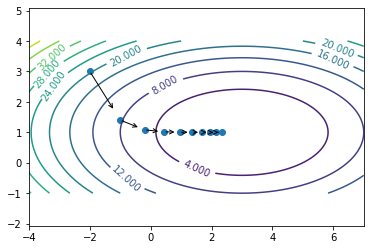

In [59]:
opt_pts = np.array(opt_pts)
opt_grads = np.array(opt_grads)

contours = plt.contour(X,Y,L_grid,10)
plt.clabel(contours)
plt.scatter(opt_pts[:,0],opt_pts[:,1])

for opt_pt, opt_grad in zip(opt_pts,opt_grads):
  plt.annotate('',xytext=(opt_pt[0],opt_pt[1]),
               xy= (opt_pt[0]-0.8*step_size*opt_grad[0], opt_pt[1] - 0.8*step_size*opt_grad[1]),
               arrowprops ={'arrowstyle':'->'},va='center',ha='center')
plt.axis('equal')

## Part 2: Gradient Descent in Linear Models

Lets now use gradient descent to derive a supervised learning algorithm for linear models.

** Review: Linear Model family **
Recall that a linear model has the form
$$ y = \theta_0 + \theta_1*x_1 + \theta_2*x_2+\ldots+\theta_d*x_d$$
where $x\inℝ^d$ is a vector of features(attributes) and $y$ is the target. The $\theta_j$ are the parameters of the model.

By using the notation $x_0=1$, we can represent the model in a vectorized form

$$f_θ(x) = ∑_{j=0}^{d}θ_j*x_j = \Theta^Tx$$

Lets define our model in Python.

In [60]:
def f(X,theta):
  """ The linear model we are trying to fit.

  Parameters:
  theta (np.array): d-dimensional vector of parameters
  X (np.array): (n,d)-dimensional data matrix

  Returns:
  y_pred (np.array): n-dimensional vector of predicted targets
  """
  return X.dot(theta)

**A Cost(loss) function: Mean Squared Error**
We pick θ to minimize the mean squared error (MSE). Slight variants of this cost function are also known as the residual sum of squares (RSS) or the sum of squared residuals(SSR).

$$
L(θ) = \frac{1}{n}∑_{i=1}^n(y^{(i)} - Θ^Tx^{(i)})^2
$$

In other words, we are looking for the best compromise in Θ over all the data points.

Lets implement mean squared error.

In [73]:
def mean_squared_error(theta,X,y):
  """ The cost function, L, describing the goodness of fit.
  Parameters:
  theta (np.array): d-dimensional vector of parameters
  X (np.array): (n,d)-dimensional design matrix
  y (np.array): n-dimensional vector of targets
  """
  return 0.5*np.mean((y-f(X,theta))**2)

**Mean Squared Error: Partial Derivatives**

Lets work out what a partial derivative is for the MSE error loss for a linear model.

\begin{align}
  \frac{∂L(θ)}{∂θ_j} &=  \frac{∂}{∂\theta_j}(f_θ(x)-y)^2 \\
  &= (f_θ(x)-y)*\frac{∂}{∂θ_j}(f_θ(x)-y)\\
  &= (f_θ(x)-y)*\frac{∂}{∂θ_j}(∑_{k=0}^d(\theta_k*x_k)-y)\\
    &= (f_θ(x)-y)*x_j\\
\end{align}

**Mean Squared Error: The Gradient**

We can use this derivation to obtain an expression for the gradient of the MSE for a linear model.

$$
∇_\theta L(\theta) = 
\begin{pmatrix}
\frac{∂f(\theta)}{∂θ_0} \\
\frac{∂f(\theta)}{∂θ_1} \\
\vdots \\
\frac{∂f(\theta)}{∂θ_d}
\end{pmatrix}
= 
\begin{pmatrix}
(f_θ(x)-y)*x_1 \\
(f_θ(x)-y)*x_2 \\
\vdots \\
(f_θ(x)-y)*x_d
\end{pmatrix}
=(f_θ(x)-y)*\boldsymbol{x} \\
$$

Let's implement the gradient.

In [74]:
def mse_gradient(theta,X,y):
  """ The gradient of the cost function

  Parameters:
  theta (np.array): d-dimensional vector of parameters
  X (np.array): (n,d)-dimensional design matrix
  y (np.array): n-dimensional vector of targets

  Returns:
  grad (np.array): d-dimensional gradient of the MSE
  """
  return np.mean((f(X,theta)-y)*X.T, axis = 1)

**The UCI Diabetes Dataset**
In this section, we are going to use the UCI Diabetes Dataset.

- for each patient, we have access to a measurement of their body mass index(BMI) and a quantitative diabetes risk score (0-300)
- We are interested in understanding how BMI affects an individual's diabetes risk.

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import numpy as np
import pandas as pd
from sklearn import datasets

Text(0, 0.5, 'Diabetes Risk')

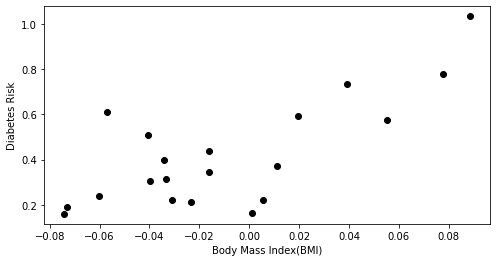

In [82]:
# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True,as_frame=True)

# add an extra column of ones
X['one'] = 1

# collect 20 data points and only use BMI 
X_train = X.iloc[-20:].loc[:,['bmi','one']]
y_train = y.iloc[-20:] / 300

plt.scatter(X_train.loc[:,['bmi']],y_train, color='black')
plt.xlabel('Body Mass Index(BMI)')
plt.ylabel('Diabetes Risk')

**Gradient Descent for Linear Regression**

Putting this together with the gradient descent algorithm, we obtain a learning method for training linear models.

In [83]:
threshold = 1e-3
step_size = 4e-1
theta, theta_prev = np.array([2,1]), np.ones(2,)
opt_pts = [theta]
opt_grads = []
iter = 0

while np.linalg.norm(theta - theta_prev) > threshold:
  if iter % 100 == 0:
    print(f'Iteration {iter}. MSE: {mean_squared_error(theta,X_train,y_train)}')
  theta_prev = theta
  gradient = mse_gradient(theta,X_train, y_train)
  theta = theta_prev - step_size * gradient
  opt_pts += [theta]
  opt_grads += [gradient]
  iter += 1

Iteration 0. MSE: 0.17172872152929558
Iteration 100. MSE: 0.014764502290373608
Iteration 200. MSE: 0.014348521984997187
Iteration 300. MSE: 0.013997214677900948
Iteration 400. MSE: 0.013700525574056174


Text(0, 0.5, 'Diabetes Risk')

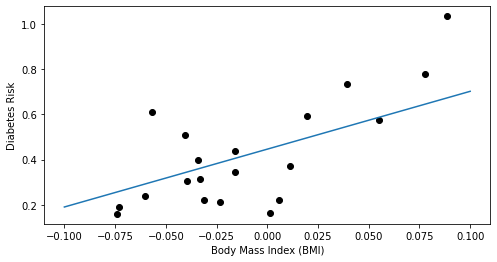

In [84]:
x_line = np.stack([np.linspace(-0.1,0.1,10),np.ones(10,)])
y_line = opt_pts[-1].dot(x_line)

plt.scatter(X_train.loc[:,['bmi']],y_train, color='black')
plt.plot(x_line[0],y_line)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

**Part 3: Ordinary Least Squares**

In practice, there is a more effective way than gradient descent to find linear model parameters.

We will see this method here, which will lead to our first non-toy algorithm: Ordinary Least Squares.

**The UCI Diabetes Dataset**
In this section, we are going to use the UCI Diabetes Dataset.

- for each patient, we have access to a measurement of their body mass index(BMI) and a quantitative diabetes risk score (0-300)
- We are interested in understanding how BMI affects an individual's diabetes risk.

Text(0, 0.5, 'Diabetes Risk')

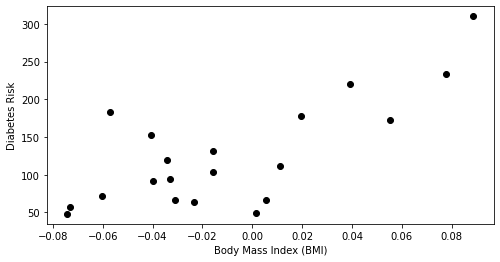

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import numpy as np
import pandas as pd
from sklearn import datasets

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# add an extra column of onens
X['one'] = 1

# Collect 20 data points
X_train = X.iloc[-20:]
y_train = y.iloc[-20:]

plt.scatter(X_train.loc[:,['bmi']], y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')


**Notation: Design Matrix**

Machine learning algorithms are most easily defined in the language of linear algebra. Therefore, it will be useful to represent the entire dataset as one matrix $𝑋 \in ℝ^{n \times d}$, of the form: 

$$
𝑋 = \begin{bmatrix}
x_1^{(1)} & x_2^{(1)} & \cdots & x_d^{(1)} \\
x_1^{(2)} & x_2^{(2)} & \cdots & x_d^{(2)} \\
\vdots \\
x_1^{(n)} & x_2^{(n)} & \cdots & x_d^{(n)} \\
\end{bmatrix}
$$
We can view the design matri for the diabetes dataset.

In [86]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,one
422,-0.078165,0.050680,0.077863,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040672,-0.009362,1
423,0.009016,0.050680,-0.039618,0.028758,0.038334,0.073529,-0.072854,0.108111,0.015567,-0.046641,1
424,0.001751,0.050680,0.011039,-0.019442,-0.016704,-0.003819,-0.047082,0.034309,0.024053,0.023775,1
425,-0.078165,-0.044642,-0.040696,-0.081414,-0.100638,-0.112795,0.022869,-0.076395,-0.020289,-0.050783,1
426,0.030811,0.050680,-0.034229,0.043677,0.057597,0.068831,-0.032356,0.057557,0.035462,0.085907,1


**Notation: Design Matrix**

Similarly, we can vectorize the target variables into a vector $y \in ℝ^n$ of the form
$$
y = \begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(n)}
\end{bmatrix}
$$

**Squared Error in Matrix Form**
Recall that we may fit a linear model by choosing $\theta$ that minimizes the squared error:
$$
L(θ) = ∑_{i=1}^n(y^{i} - θ^Tx^{(i)})^2
$$

In other words, we are looking for the best compromise in θ over all the data points.

We can write this sum in matrix-vector form as:
$$
L(θ) = (y - 𝑋θ)^T(y-𝑋θ) = || y - 𝑋θ||
$$
where 𝑋 is the design matrix and $\lVert ⋅ \rVert$ denotes euclidean norm.

**The Gradient of the Squared Error**

We can derive the gradient for the mean squared error as follows:

\begin{align}
∇_θ L(θ) &= ∇_θ \frac{1}{2}(𝑋θ-y)^T(𝑋θ-y) \\
&= \frac{1}{2}∇_θ((𝑋θ)^T(𝑋θ) - (𝑋θ)^T)y-y^T(𝑋θ)+y^Ty\\
&= \frac{1}{2}∇_θ(θ^T(𝑋^T𝑋)θ-2(𝑋θ)^Ty)\\
&= \frac{1}{2}(2(𝑋^T𝑋)θ-2𝑋^Ty)\\
&= (𝑋^T𝑋)θ-𝑋^Ty\\
\end{align}

we used the facts that $a^Tb=b^Ta$(line 3), that $∇_xb^Tx = b$(line 4), and that $∇_xx^TAx=2Ax$ for a symmetric matrix A (line 4).

**Normal Equations**
Setting the above derivative to zero, we obtain the *normal equations*.
$$
(𝑋^T𝑋)θ = 𝑋^Ty
$$
Hence, the value of $θ^*$ that minimizes this objective is given by:
$$
 θ^* = (𝑋^T𝑋)^{-1}𝑋^Ty
$$

Note that we assumed that the matrix $𝑋^T𝑋$ is invertible; if this is not the case, there are easy ways of addressing this issue.

Lets apply the normal equations.

In [87]:
import numpy as np

theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
theta_best_df = pd.DataFrame(data=theta_best[np.newaxis,:],columns=X.columns)
theta_best_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,one
0,-3.888868,204.648785,-64.289163,-262.796691,14003.726808,-11798.307781,-5892.15807,-1136.947646,-2736.597108,-393.879743,155.698998


We can now use our estimate of theta to compute predictions for 3 new data points.

In [88]:
# Collect 3 data points for testing
X_test = X.iloc[:3]
y_test = y.iloc[:3]

# generate predictions on the new patients
y_test_pred = X_test.dot(theta_best)

Lets visualize these predictions.

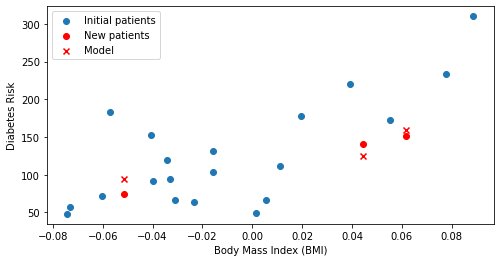

In [91]:
# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(X_train.loc[:,['bmi']],y_train)
plt.scatter(X_test.loc[:,['bmi']],y_test,color='red',marker='o')
plt.scatter(X_test.loc[:,['bmi']],y_test_pred,marker='x',color='red')
plt.legend(['Initial patients','New patients','Model'])

**Part 4: Non-Linear Least Squares**
So far, we have learned about a very simple linear model. These can capture only simple linear relationships in the data. 
How can we use what we learned so far to model more complex relationships?

We will now see a simple approach to model complex non-linear relationships called *least squares*.

**Review: Polynomial Functions**
Recall that a polynomial of degree p is a function of the form
$$
θ_0 + θ_1x + \ldots + θ_{p-1}x^{p-1} + θ_px^p 
$$

Below are some examples of polynomial functions.

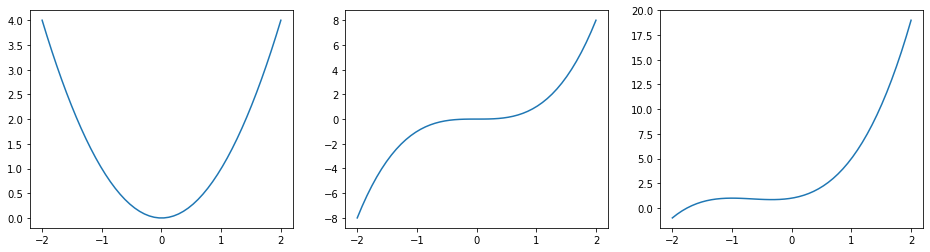

In [93]:
plt.figure(figsize=(16,4))
x_vars = np.linspace(-2,2)

plt.subplot(131)
plt.plot(x_vars,x_vars**2)

plt.subplot(132)
plt.plot(x_vars,x_vars**3)

plt.subplot(133)
plt.plot(x_vars,x_vars**3 + 2*x_vars**2 +x_vars + 1)

**Modeling Non-Linear Relationships with Polynomial Regression**

Specifically, given a 1-D continous variable x, we can define a feature function $ϕ:ℝ→ℝ^{p+1}$ as 
$$
ϕ(x) = \begin{pmatrix}
1 \\
x \\
x^2 \\
\vdots \\
x^p
\end{pmatrix}
$$ 

The class of models of the form
$$
f_Θ(x) = ∑_{j=0}^{p}Θ_px^p = Θ^Tϕ(x)
$$

with parameters Θ and polynomial features ϕ is the set of p-degree polynomials.

-  This model is non-linear in the input variable $x$, meaning that we can model complex data relationships.
- It is a linear moel as a functin of the parameters Θ, meaning that we can use our familiar ordinary least squares algorithm to learn these features.


**The UCI Diabetes Dataset**

In this section, we are going to again use the UCI Diabetes Dataset.

  - For each patient we have a access to a measurement of their body mass index (BMI) and a quantiative diabetes risk score (from 0-300).
  - We are interested in understanding how BMI affects an individual's diabetes risk.



Text(0, 0.5, 'Diabetes Risk')

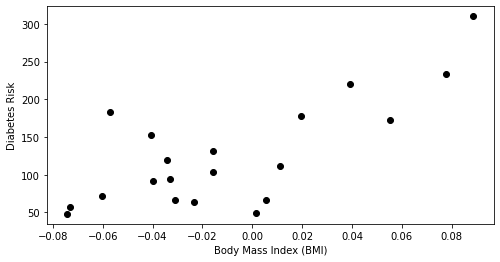

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import numpy as np
import pandas as pd
from sklearn import datasets

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# add an extra column of onens
X['one'] = 1

# Collect 20 data points
X_train = X.iloc[-20:]
y_train = y.iloc[-20:]

plt.scatter(X_train.loc[:,['bmi']], y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

**Diabetes Dataset: A Non-Linear Featurization**

Lets now obtain linear features for this dataset.

In [95]:
X_bmi = X_train.loc[:,['bmi']]

X_bmi_p3 = pd.concat([X_bmi,X_bmi**2, X_bmi**3],axis=1)
X_bmi_p3.columns = ['bmi','bmi2','bmi**3']
X_bmi_p3['one'] = 1
X_bmi_p3.head()

,bmi,bmi2,bmi**3,one
422,0.077863,0.006063,0.000472,1
423,-0.039618,0.001570,-0.000062,1
424,0.011039,0.000122,0.000001,1
425,-0.040696,0.001656,-0.000067,1
426,-0.034229,0.001172,-0.000040,1


**Diabetes Dataset: A Polynomial Model**

By training a linear model on this featurization of the diabetes set, we can obtain a polynomial model of diabetes risk as a function of BMI.

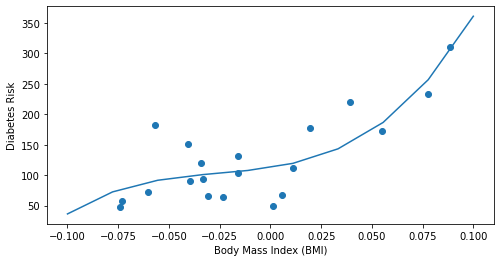

In [104]:
# Fit a linear regression
theta = np.linalg.inv(X_bmi_p3.T@X_bmi_p3)@X_bmi_p3.T@y_train

# Show the learned polynomial curve
x_line = np.linspace(-0.1, 0.1, 10)
x_line_p3 = np.stack([x_line, x_line**2, x_line**3,np.ones(10,)],axis=1)
y_train_pred = x_line_p3.dot(theta)

plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(X_bmi, y_train)
plt.plot(x_line, y_train_pred)

**Multivariate Polynomial Regression**

We can also take this approach to construct non-linear function of multiple variable by using multivariate polynomials.

For example, a polynomial of degree 2 over two variables $x_1,x_2$ is a function of the form.
$$
θ_{00} + θ_{10}x_1 + θ_{20}x_1^2 +  θ_{01}x_2 + θ_{02}x_2^2 + θ_{11}x_1x_2 
$$

In general, a polynomial of degree $p$ over two variables $x_1,x_2$ is a function of the form

$$
f(x_1,x_2) = ∑_{i,j \ge 0; i+j \le p} θ_{ij}x_1^ix_2^j
$$

In our 2-D example, this corresponds to a feature function $ϕ:ℝ^2→ℝ^6$ of the form
$$
ϕ(x) = 
\begin{bmatrix}
1 \\
x_1 \\
x_1^2 \\
x_2 \\
x_2^2 \\
x_1x_2 
\end{bmatrix}
$$
The same approach holdf for polynomials of any degree and any number of variables.

**Towards general Non-Linear Features**
Any non-linear feature map $ϕ(x):ℝ^d →ℝ^p$ can be used in this way to obtain general models of the form
$$
f_θ(x) = θ^Tϕ(x)
$$
that are highly non-linear in $x$ but linear in θ.